# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
# We only train the training set and once the training is done
# we can introduce the test set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
# before comma is everything from the begin until the end of the col
# after the comma is the index of the column we want
# 2 is not included and .values creates a numpy array
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [4]:
# Whenever we build a RNN and special if there is a sigmoid
# function as the activation function as the activation
# function in the output layer of our recurrent neural network,
# it is recommended to apply normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(
    feature_range=(0, 1)
)

# Apply normalization to our data
# fit is going to get the minimum and the maximi stock price 
# to apply the normalization formula
training_set_scaled = sc.fit_transform(training_set)

print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [5]:
# 60 timesteps means that at each time T, the RNN is going to look
# at the 60 stock prices before time T, and, based on the trends,
# it is capturing during these 60 previous timesteps, it will try
# to predict the next output.
# 60 timesteps passed from which RNN is gonna try to learn and
# undestand some correlations, and based on its understanding, 
# it's going to try to predict the next output.
# 60 is a number experimented, trying different number of timesteps
# 60 timesteps corresponds to 3 months

# Input - 60 previous stock prices
X_train = []

# Output - the next financial day
y_train = []

for i in range(60, 1258):
    # Append last 60 stocks
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i])

X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [6]:
# Number of predictors we can us to predict what we want
X_train = np.reshape(
    X_train, 
    (X_train.shape[0], X_train.shape[1], 
     1
    )
)
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [8]:
# We're predicting a continuous output, a continuous value, and 
# therefore, we are doing some regression. Regression is about 
# predicting the continuous value, and classification is about
# predicting a category
regressor = Sequential()

2021-12-27 16:55:04.922188: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Adding the first LSTM layer and some Dropout regularisation

In [9]:
# We add some Dropout regularisation to avoid Overfitting
regressor.add(
    LSTM(
        # neurons
        units = 50,
        # True because we will add another layer after this one
        return_sequences = True,
        # Only for the first layer we need to specify the input shape
        input_shape = (
            X_train.shape[1], 
            1
        )
    )
)

regressor.add(
    Dropout(
        # 20% is a common value in here
        0.2 # rate
    )
)

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
# We add some Dropout regularisation to avoid Overfitting
regressor.add(
    LSTM(
        # neurons
        units = 50,
        # True because we will add another layer after this one
        return_sequences = True,
        # input_shape is recognized automatically thanks to the
        # units argument we're specifying which tells that we have
        # 50 neurons in the previous layer
    )
)

regressor.add(
    Dropout(
        # 20% is a common value in here
        0.2 # rate
    )
)

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
# We add some Dropout regularisation to avoid Overfitting
regressor.add(
    LSTM(
        # neurons
        units = 50,
        # True because we will add another layer after this one
        return_sequences = True,
        # input_shape is recognized automatically thanks to the
        # units argument we're specifying which tells that we have
        # 50 neurons in the previous layer
    )
)

regressor.add(
    Dropout(
        # 20% is a common value in here
        0.2 # rate
    )
)

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
# We add some Dropout regularisation to avoid Overfitting
regressor.add(
    LSTM(
        # neurons
        units = 50,
        # Since this is the last, we don't need the return_sequences
        # so, we can just remove it that will default to False
        # input_shape is recognized automatically thanks to the
        # units argument we're specifying which tells that we have
        # 50 neurons in the previous layer
    )
)

regressor.add(
    Dropout(
        # 20% is a common value in here
        0.2 # rate
    )
)

### Adding the output layer

In [13]:
regressor.add(
    Dense(
        # Only 1 output
        units = 1
    )
)

### Compiling the RNN

In [14]:
regressor.compile(
    optimizer = 'adam', # always a safe choice
    loss = 'mean_squared_error' # regression loss function
)

### Fitting the RNN to the Training set

In [15]:
regressor.fit(
    # features
    X_train,
    y_train,
    # Epochs - number of iterations to forward and back propagate 
    # to update the wait
    epochs = 100,
    # Instead of updating the weight on every stock price forward 
    # propagated into the neural network and then generating an 
    # error that is back propagated into the neural network, we will
    # do that every 32 stock prices.
    batch_size = 32
)

Epoch 1/100
38/38 [==============================] - 13s 118ms/step - loss: 0.0436
Epoch 2/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0056
Epoch 3/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0042
Epoch 7/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0050
Epoch 13/100

38/38 [==============================] - 5s 126ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0013


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Getting the predicted stock price of 2017

In [17]:
dataset_total = pd.concat(
    (dataset_train['Open'], dataset_test['Open']),
    axis = 0
)
print(dataset_total)

# Inputs needed to predict the January stock prices
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)

print(inputs)

inputs = sc.transform(inputs)

print(inputs)

# Input - 60 previous stock prices
X_test = []

for i in range(60, 80):
    # Append last 60 stocks
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

# Number of predictors we can us to predict what we want
X_test = np.reshape(
    X_test, 
    (X_test.shape[0], X_test.shape[1], 
     1
    )
)
print(X_test)

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

print(predicted_stock_price)

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64
[[779.  ]
 [779.66]
 [777.71]
 [786.66]
 [783.76]
 [781.22]
 [781.65]
 [779.8 ]
 [787.85]
 [798.24]
 [803.3 ]
 [795.  ]
 [804.9 ]
 [816.68]
 [806.34]
 [801.  ]
 [808.35]
 [795.47]
 [782.89]
 [778.2 ]
 [767.25]
 [750.66]
 [774.5 ]
 [783.4 ]
 [779.94]
 [791.17]
 [756.54]
 [755.6 ]
 [746.97]
 [755.2 ]
 [766.92]
 [771.37]
 [762.61]
 [772.63]
 [767.73]
 [764.26]
 [760.  ]
 [771.53]
 [770.07]
 [757.44]
 [744.59]
 [757.71]
 [764.73]
 [761.  ]
 [772.48]
 [780.  ]
 [785.04]
 [793.9 ]
 [797.4 ]
 [797.34]
 [800.4 ]
 [790.22]
 [796.76]
 [795.84]
 [792.36]
 [790.9 ]
 [790.68]
 [793.7 ]
 [783.33]
 [782.75]
 [778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]
[[0.9299055 ]
 

### Visualising the results

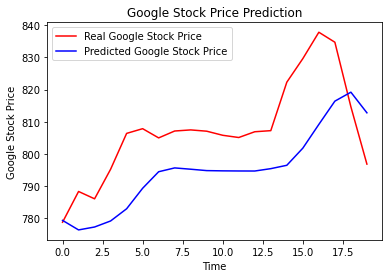

In [18]:
plt.plot(
    real_stock_price,
    color = 'red',
    label = 'Real Google Stock Price'
)

plt.plot(
    predicted_stock_price,
    color = 'blue',
    label = 'Predicted Google Stock Price'
)

plt.title('Google Stock Price Prediction')

plt.xlabel('Time')
plt.ylabel('Google Stock Price')

plt.legend()

plt.show()

In the parts where we have some spikes, it's impossible to predict because that's how the stock market work but the smooth variations, the model is able to predict the prices